<a href="https://colab.research.google.com/github/ivandean1985/deepai/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
# ＤataFrame: table. Series: line/row.
df = pd.DataFrame(boston["data"],
                  columns=boston["feature_names"])
df["answer"] = boston["target"]
df.to_csv("boston.csv",encoding="utf-8", index=False)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,answer
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [44]:
#train_test_split 切分使用
from sklearn.model_selection  import train_test_split
train_test_split([1,2,3,4],
                 [5,6,7,8],
                 [9,10,11,12],
                 test_size=0.25)

[[4, 2, 3], [1], [8, 6, 7], [5], [12, 10, 11], [9]]

In [45]:
#sklearn 
import numpy as np
from sklearn.model_selection  import train_test_split
x, y = np.array(df.drop(["answer"], axis=1)), np.array(df["answer"])
x_tranin, x_test, y_train, y_test = train_test_split(x,
                                  y,
                                  test_size=0.1)
print(x_tranin.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 13)
(51, 13)
(455,)
(51,)


In [46]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(x_tranin, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(279.0, 475.65000000000003, 'RM <= 6.971\nmse = 85.889\nsamples = 455\nvalue = 22.383'),
 Text(139.5, 339.75, 'LSTAT <= 14.395\nmse = 43.258\nsamples = 394\nvalue = 19.947'),
 Text(69.75, 203.85000000000002, 'DIS <= 1.434\nmse = 28.16\nsamples = 234\nvalue = 23.525'),
 Text(34.875, 67.94999999999999, '\n  (...)  \n'),
 Text(104.625, 67.94999999999999, '\n  (...)  \n'),
 Text(209.25, 203.85000000000002, 'NOX <= 0.607\nmse = 19.238\nsamples = 160\nvalue = 14.714'),
 Text(174.375, 67.94999999999999, '\n  (...)  \n'),
 Text(244.125, 67.94999999999999, '\n  (...)  \n'),
 Text(418.5, 339.75, 'RM <= 7.445\nmse = 75.425\nsamples = 61\nvalue = 38.115'),
 Text(348.75, 203.85000000000002, 'NOX <= 0.659\nmse = 29.145\nsamples = 35\nvalue = 32.529'),
 Text(313.875, 67.94999999999999, '\n  (...)  \n'),
 Text(383.625, 67.94999999999999, '\n  (...)  \n'),
 Text(488.25, 203.85000000000002, 'RM <= 8.753\nmse = 39.169\nsamples = 26\nvalue = 45.635'),
 Text(453.375, 67.94999999999999, '\n  (...)  \n'

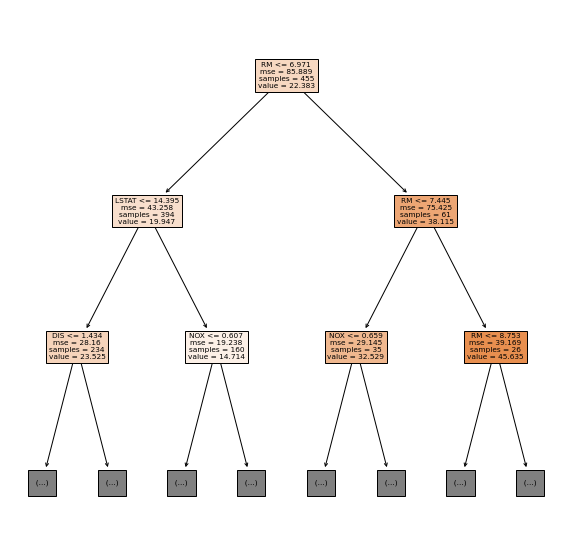

In [47]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(reg, 
          feature_names=boston["feature_names"],
          filled=True,
          max_depth=2)

#任何演選法都要避免選到最好的

In [48]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
#RMSE開更號後再開更號
r2_score(y_test, pre)#驗證的目的是回頭做參數的選擇

0.654672800064345